# MLET TechChallenge Fase 3 - Modelo de Regressão no Campeonato Brasileiro

## 1 - Apresentação

**Objetivo**

Realizar a previsão de um time ser o vencedor de determinado confronto.
Será utilizada a **Regressão Linear**, onde o resultado do jogo se relaciona com um conjunto de dados relacionados ao campeonato brasileiro.

**Técnica**
Aprendizagem supervisionada, mais precisamente a técnbica de Regressão.

A regressão é um tipo de aprendizado de máquina supervisionado que é usado para prever valores contínuos ou quantidades, como custo, salário ou vendas. A regressão é uma ferramenta que utiliza métodos estatísticos para modelar as relações entre variáveis dependentes e independentes.

## 2 - Carregando os dados




In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [ ]:
dados = pd.read_csv('/content/sample_data/mundo_transfermarkt_competicoes_brasileirao_serie_a_1.csv')
dados.head()

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2004,2004-04-22,1,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Flamengo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,2004-04-29,3,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Corinthians,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,2004-07-21,17,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Paraná,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,2004-07-29,19,Arena do Grêmio,NaN,NaN,NaN,Grêmio,EC Vitória,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,2004-10-03,34,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Criciúma EC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3 - Apresentação de dados inicial

Visualizar quantidade de linhas x colunas:

In [ ]:
dados.shape

(8349, 35)

Visualização da quantidade dos valor dos dados por coluna:

In [ ]:
for coluna in dados.columns:
    print('========='*30)
    print(dados[coluna].value_counts())

ano_campeonato
2004    456
2003    456
2005    418
2008    380
2017    380
2018    380
2016    380
2019    380
2020    380
2007    380
2021    380
2009    380
2015    380
2010    380
2022    380
2013    380
2011    380
2023    380
2012    380
2014    380
2006    380
2024    179
Name: count, dtype: int64
data
2004-07-14    12
2004-07-21    12
2008-12-07    10
2015-12-06    10
2007-07-04    10
              ..
2021-06-21     1
2019-08-12     1
2011-07-14     1
2019-09-23     1
2019-07-27     1
Name: count, Length: 2071, dtype: int64
rodada
1     225
18    225
12    225
15    225
14    225
7     225
20    225
4     225
3     225
21    225
9     225
2     225
13    225
8     225
17    223
6     223
16    223
5     223
19    221
22    216
35    215
29    215
10    215
32    215
34    215
11    215
26    215
30    215
31    215
33    215
28    215
24    215
38    215
23    215
36    215
37    215
25    215
27    215
Name: count, dtype: int64
estadio
Estádio Jornalista Mário Filho            

Visualização das informações das colunas do Dataset:

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8349 non-null   int64  
 1   data                            8349 non-null   object 
 2   rodada                          8349 non-null   int64  
 3   estadio                         8338 non-null   object 
 4   arbitro                         6639 non-null   object 
 5   publico                         6638 non-null   float64
 6   publico_max                     4079 non-null   float64
 7   time_mandante                   8349 non-null   object 
 8   time_visitante                  8349 non-null   object 
 9   tecnico_mandante                6195 non-null   object 
 10  tecnico_visitante               6195 non-null   object 
 11  colocacao_mandante              6639 non-null   float64
 12  colocacao_visitante             66

## 4 - Tratamento de dados

### Adicionando o resultado dos jogos

Adicionando a variável "**res**" de acordo com os valores de gols mandante e visitante:


*   Valor igual a "1" quando o vencedor do confronto é o time mandante
*   Valor igual a "-1" quando o vencedor do confronto é o time visitante
*   Valor igual a "0" quando para empate

In [ ]:
dados['res'] = dados.apply(
    lambda row: 1 if row['gols_mandante'] > row['gols_visitante'] else
                (2 if row['gols_mandante'] < row['gols_visitante'] else 0),
    axis=1
)

dados.head()

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,res
0,2004,2004-04-22,1,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Flamengo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2004,2004-04-29,3,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Corinthians,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2004,2004-07-21,17,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Paraná,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2004,2004-07-29,19,Arena do Grêmio,NaN,NaN,NaN,Grêmio,EC Vitória,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2004,2004-10-03,34,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Criciúma EC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Explorando os dados

In [ ]:
num_jogos = dados.shape[0]

cols = dados.shape[1] -1 #Retirando a coluna Resultado

mandante_vencedor = len(dados[dados.res==1])
visitante_vencedor = len(dados[dados.res==2])
empate = len(dados[dados.res==0])
val=[mandante_vencedor,visitante_vencedor,empate]

per_jogos_ganhos_casa = (float(mandante_vencedor)/(num_jogos)) *100

print ('Total de jogos: ', num_jogos)
print ('Total de colunas: ', cols)
print ('Total de jogos ganhos em casa: ', mandante_vencedor)
print ('Total de jogos ganhos pelo visitante: ', visitante_vencedor)
print ('Total de jogos empatados: ', empate)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( per_jogos_ganhos_casa ))

Total de jogos:  8349
Total de colunas:  35
Total de jogos ganhos em casa:  4127
Total de jogos ganhos pelo visitante:  2000
Total de jogos empatados:  2222
Percentual de jogos ganhos em casa: 49.43%


### Visualização dos dados por tipo resultado


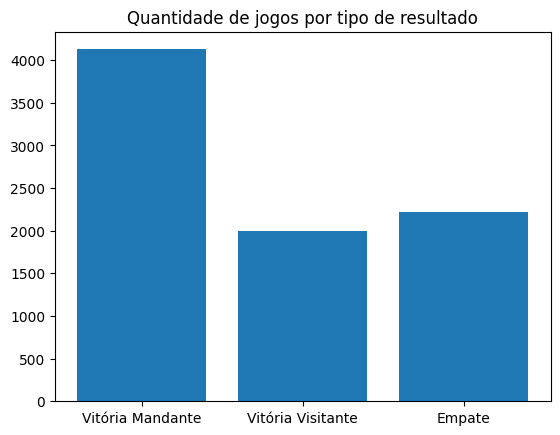

In [ ]:
x = np.arange(3)
plt.bar(x, val)
plt.xticks(x, ('Vitória Mandante', 'Vitória Visitante', 'Empate'))
plt.title('Quantidade de jogos por tipo de resultado')
plt.show()

### Configurando novas variáveis e ajustando modelo

Alterando nome do time mandante e visitante para números


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_mandante = LabelEncoder()
label_encoder_visitante = LabelEncoder()
dados['time_mandante'] = label_encoder_mandante.fit_transform(dados['time_mandante'])
dados['time_visitante'] = label_encoder_visitante.fit_transform(dados['time_visitante'])

dados.head()

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,res
0,2004,2004-04-22,1,Arena do Grêmio,NaN,NaN,NaN,26,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2004,2004-04-29,3,Arena do Grêmio,NaN,NaN,NaN,26,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2004,2004-07-21,17,Arena do Grêmio,NaN,NaN,NaN,26,34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2004,2004-07-29,19,Arena do Grêmio,NaN,NaN,NaN,26,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2004,2004-10-03,34,Arena do Grêmio,NaN,NaN,NaN,26,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Removendo variáveis não numéricas

In [ ]:
dados = dados.drop(['data','estadio','arbitro','publico','publico_max','tecnico_mandante','tecnico_visitante'], axis = 1)

display(dados.head())

,ano_campeonato,rodada,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,...,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,res
0,2004,1,26,21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2004,3,26,13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2004,17,26,34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2004,19,26,19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2004,34,26,15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Adicionando o ID do jogo

In [ ]:
dados["id_jogo"] = dados.index

Separando o resultado do dataset

In [ ]:
dados_novos = dados.drop(['res'], axis = 1)
resultado = dados['res']
print('Dados')
print (dados_novos.head())
print ('=========')
print ('Resultado')
print (resultado.head())

Dados
   ano_campeonato  rodada  time_mandante  time_visitante  colocacao_mandante  \
0            2004       1             26              21                 NaN   
1            2004       3             26              13                 NaN   
2            2004      17             26              34                 NaN   
3            2004      19             26              19                 NaN   
4            2004      34             26              15                 NaN   

   colocacao_visitante  valor_equipe_titular_mandante  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN                            NaN   
4                  NaN                            NaN   

   valor_equipe_titular_visitante  idade_media_titular_mandante  \
0                             NaN                           NaN   
1                             NaN   

### Lidando com dados nulos

Determinando a quantidade de dados nulos percentualmente em cada coluna:


In [ ]:
# Calculando os valores ausentes
nulos = dados_novos.isnull().sum()

# Calculando a porcentagem de valores ausentes para cada coluna
nulos_per = (nulos / len(dados_novos)) * 100

# Criando um resumo dos valores ausentes
nulos_resumo = pd.DataFrame({
    'Colunas': dados_novos.columns,
    'Nulos': nulos,
    'Nulos Percentagem (%)': nulos_per
}).sort_values(by='Nulos Percentagem (%)', ascending=False)

# Exibindo os primeiros registros do resumo
nulos_resumo.head()

,Colunas,Nulos,Nulos Percentagem (%)
escanteios_mandante,escanteios_mandante,6366,76.248653
chutes_mandante,chutes_mandante,6366,76.248653
impedimentos_mandante,impedimentos_mandante,6366,76.248653
defesas_visitante,defesas_visitante,6366,76.248653
defesas_mandante,defesas_mandante,6366,76.248653


Remoção de colunas com mais de 50% de valores nulos e colunas que não serão utilizadas para testar e treinar o modelo:

In [ ]:
remove = nulos_resumo[nulos_resumo['Nulos Percentagem (%)'] > 50]['Colunas'].tolist()
novos_dados = dados_novos.drop(columns=remove)

for column in novos_dados.columns:
    if novos_dados[column].dtype == 'object':
        novos_dados[column] = novos_dados[column].fillna(novos_dados[column].mode()[0])
    else:
        novos_dados[column] = novos_dados[column].fillna(novos_dados[column].mean())

#novos_dados.drop(['data',  'estadio', 'arbitro',
 #                   'publico', 'tecnico_mandante', 'tecnico_visitante' ], axis = 1, inplace=True)

novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8349 non-null   int64  
 1   rodada                          8349 non-null   int64  
 2   time_mandante                   8349 non-null   int64  
 3   time_visitante                  8349 non-null   int64  
 4   colocacao_mandante              8349 non-null   float64
 5   colocacao_visitante             8349 non-null   float64
 6   valor_equipe_titular_mandante   8349 non-null   float64
 7   valor_equipe_titular_visitante  8349 non-null   float64
 8   idade_media_titular_mandante    8349 non-null   float64
 9   idade_media_titular_visitante   8349 non-null   float64
 10  gols_mandante                   8349 non-null   float64
 11  gols_visitante                  8349 non-null   float64
 12  gols_1_tempo_mandante           83

### Escolhendo melhores parametros com Kbest

In [ ]:

novos_dados.columns

Index(['ano_campeonato', 'rodada', 'time_mandante', 'time_visitante',
       'colocacao_mandante', 'colocacao_visitante',
       'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
       'idade_media_titular_mandante', 'idade_media_titular_visitante',
       'gols_mandante', 'gols_visitante', 'gols_1_tempo_mandante',
       'gols_1_tempo_visitante', 'id_jogo'],
      dtype='object')

In [ ]:
#Escolhendo as melhores features com Kbest

features_list = ('ano_campeonato', 'rodada', 'time_mandante', 'time_visitante',
       'colocacao_mandante', 'colocacao_visitante',
       'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
       'idade_media_titular_mandante', 'idade_media_titular_visitante',
       'gols_mandante', 'gols_visitante', 'gols_1_tempo_mandante',
       'gols_1_tempo_visitante', 'id_jogo')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(novos_dados, resultado)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores parametros:")
print (k_best_features_final)


Melhores parametros:
{'gols_visitante': 2626.8957505469884, 'gols_1_tempo_mandante': 2571.590609669343, 'id_jogo': 589.7815207125288, 'gols_1_tempo_visitante': 582.8247052837213, 'colocacao_visitante': 107.47912545533949, 'valor_equipe_titular_mandante': 78.00013114644752, 'idade_media_titular_mandante': 77.69086201229624, 'valor_equipe_titular_visitante': 47.20357448732466, 'time_visitante': 6.744176476107607, 'rodada': 5.036846578829135, 'gols_mandante': 3.3673654354791447, 'time_mandante': 2.4066401528333174, 'colocacao_mandante': 1.0253281210265681, 'idade_media_titular_visitante': 0.020236029762830208}


Separando as melhores variaveis para treinar e testar o modelo de acordo com o Kbest

In [ ]:

melhores_dados = novos_dados.drop(['time_visitante','rodada','gols_mandante', 'time_mandante','colocacao_mandante',
                             'idade_media_titular_visitante'], axis = 1)



print('Melhores dados')
print (melhores_dados.head())

print ('=========')

print ('Resultados')
print (resultado.head())

Melhores dados
   ano_campeonato  colocacao_visitante  valor_equipe_titular_mandante  \
0            2004            10.379123                   1.642289e+07   
1            2004            10.379123                   1.642289e+07   
2            2004            10.379123                   1.642289e+07   
3            2004            10.379123                   1.642289e+07   
4            2004            10.379123                   1.642289e+07   

   valor_equipe_titular_visitante  idade_media_titular_mandante  \
0                    1.601536e+07                     27.295903   
1                    1.601536e+07                     27.295903   
2                    1.601536e+07                     27.295903   
3                    1.601536e+07                     27.295903   
4                    1.601536e+07                     27.295903   

   gols_visitante  gols_1_tempo_mandante  gols_1_tempo_visitante  id_jogo  
0             0.0               0.665057                0.433464   

### Normalizando os dados

In [ ]:
# Normalizando os dados de entrada

# Gerando o novo padrão
scaler = MinMaxScaler().fit(melhores_dados)
dados_normalizados = scaler.transform(melhores_dados)

print ('Dados Normalizados: ',dados_normalizados.shape)
print (dados_normalizados)

Dados Normalizados:  (8349, 9)
[[4.76190476e-02 4.93638072e-01 1.63407141e-01 ... 1.33011467e-01
  1.08366023e-01 0.00000000e+00]
 [4.76190476e-02 4.93638072e-01 1.63407141e-01 ... 1.33011467e-01
  1.08366023e-01 1.19789171e-04]
 [4.76190476e-02 4.93638072e-01 1.63407141e-01 ... 1.33011467e-01
  1.08366023e-01 2.39578342e-04]
 ...
 [1.42857143e-01 4.93638072e-01 1.63407141e-01 ... 1.33011467e-01
  1.08366023e-01 9.99760422e-01]
 [1.42857143e-01 4.93638072e-01 1.63407141e-01 ... 1.33011467e-01
  1.08366023e-01 9.99880211e-01]
 [1.42857143e-01 4.93638072e-01 1.63407141e-01 ... 1.33011467e-01
  1.08366023e-01 1.00000000e+00]]


In [ ]:
novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8349 non-null   int64  
 1   rodada                          8349 non-null   int64  
 2   time_mandante                   8349 non-null   int64  
 3   time_visitante                  8349 non-null   int64  
 4   colocacao_mandante              8349 non-null   float64
 5   colocacao_visitante             8349 non-null   float64
 6   valor_equipe_titular_mandante   8349 non-null   float64
 7   valor_equipe_titular_visitante  8349 non-null   float64
 8   idade_media_titular_mandante    8349 non-null   float64
 9   idade_media_titular_visitante   8349 non-null   float64
 10  gols_mandante                   8349 non-null   float64
 11  gols_visitante                  8349 non-null   float64
 12  gols_1_tempo_mandante           83

## 5 - Aplicando Regressão linear

#### Preparação do modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste

X_train, X_test, y_train, y_test = train_test_split(dados_normalizados, resultado, test_size=0.3, random_state=23)

In [ ]:
print(f'Exemplos para treino: {len(y_train)}. E para teste {len(y_test)}')

Exemplos para treino: 5844. E para teste 2505


#### Regressão Logistica

In [ ]:

model_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

lg_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6534930139720558 
RMSE: 0.808389147609031
MAPE: 1166800861542296.2
Acurácia LogisticRegression:0.6554890219560878
F1 Score:0.6554890219560878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Regressão Logistica com Hiperparametros

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)
search.fit(X_train,y_train)
best_model_lr = search.best_estimator_
pred= best_model_lr.predict(X_test)
lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'macro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )
print (best_model_lr)

Acurácia LogisticRegression:0.6538922155688622
F1 Score:0.5850543245254175
LogisticRegression(C=1000, max_iter=1000)


#### Support Vector Classification


In [ ]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred= model_svc.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

svc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia SVC:{}'.format(svc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6990019960079841 
RMSE: 0.8360633923381552
MAPE: 990612133605246.9
Acurácia SVC:0.6231536926147705
F1 Score:0.6231536926147705


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVC com Hiperparametros

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
search = GridSearchCV(SVC(), param_grid)
search.fit(X_train,y_train)
best_model_SVC = search.best_estimator_
pred= best_model_SVC.predict(X_test)
acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'micro')
print ('F1 Score:{}'.format(f1))
print ('Acurácia SVC:{}'.format(acc))
print(best_model_SVC)

F1 Score:0.6614770459081837
Acurácia SVC:0.6614770459081837
SVC(C=10)


### Árvore de Decisão

In [ ]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)
y_pred= model_DTC.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia SVC:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6990019960079841 
RMSE: 0.8360633923381552
MAPE: 990612133605246.9
Acurácia SVC:0.6231536926147705
F1 Score:0.6231536926147705


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Arvore de Descisão com hiperparametros

In [ ]:

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
search = GridSearchCV(DecisionTreeClassifier(), param_grid)
search.fit(X_train,y_train)
best_model_DTC = search.best_estimator_
pred= best_model_DTC.predict(X_test)
dt_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

print (best_model_DTC)

Acurácia Decision Tree:0.6311377245508982
F1 Score:0.6311377245508982
DecisionTreeClassifier(max_depth=110, max_features=3, min_samples_leaf=5,
                       min_samples_split=8)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Naive Baeys

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred= model_NB.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia SVC:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6487025948103793 
RMSE: 0.8054207563816439
MAPE: 1082302185899017.4
Acurácia SVC:0.6363273453093813
F1 Score:0.6363273453093813


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### XGBoosting

In [ ]:
model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred = model_XGB.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia XGBoosting:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6562874251497006 
RMSE: 0.8101156862755471
MAPE: 1075110809248525.6
Acurácia XGBoosting:0.6550898203592814
F1 Score:0.6550898203592814


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Multilayer Perceptron (MLP)

In [ ]:
model_MLP = MLPClassifier()
model_MLP.fit(X_train, y_train)
y_pred = model_MLP.predict(X_test)
pred_mlp = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia Multilayer Perceptron:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.631936127744511 
RMSE: 0.7949441035346517
MAPE: 1271075822974427.5
Acurácia Multilayer Perceptron:0.6662674650698602
F1 Score:0.6662674650698602


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Classifier

In [ ]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)



In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia Random Forest:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6479041916167665 
RMSE: 0.8049249602396279
MAPE: 1012186263556722.2
Acurácia Random Forest:0.6467065868263473
F1 Score:0.6467065868263473


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Matrix de Confusão

Baseado no resultado da acurácia do F1 Score o algoritmo melhor sucedido para este modelo foi o MLP

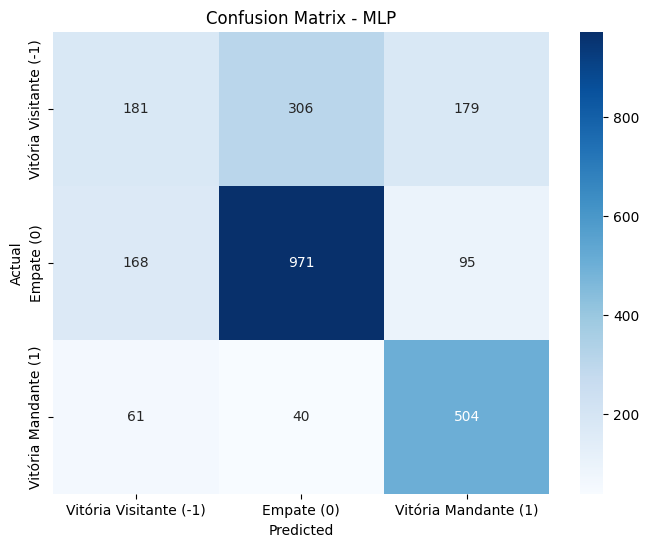

In [ ]:


# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, pred_mlp)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Vitória Visitante (-1)', 'Empate (0)', 'Vitória Mandante (1)'], yticklabels=['Vitória Visitante (-1)', 'Empate (0)', 'Vitória Mandante (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()




### Relatório de Classificação

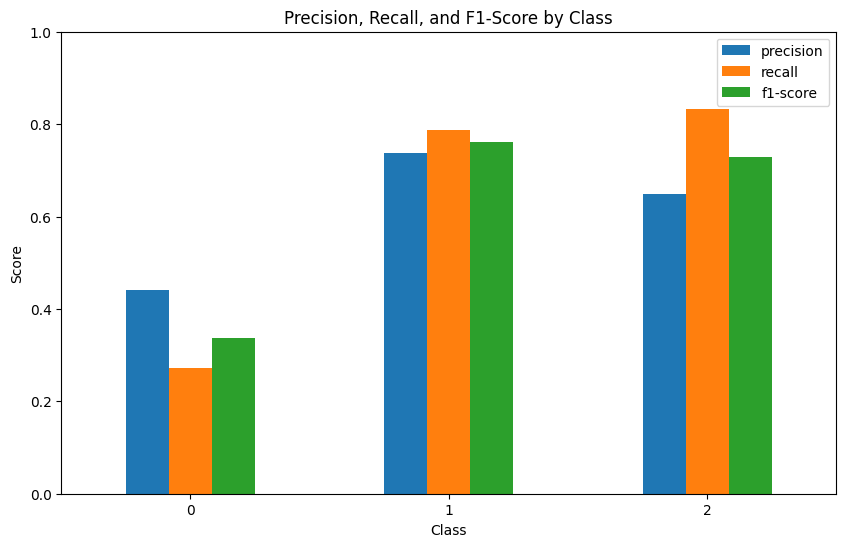

In [ ]:

report_dict = classification_report(y_test, pred_mlp, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().iloc[:-3, :3]

# Plotting precision, recall, and F1-score for each class
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.show()

Testando o modelo #TODO

# 6 - Disponibilização #TO DO

In [ ]:
import boto3
import joblib
import io

# Nome do bucket e chave do arquivo (pode ser um nome personalizado)
bucket_name = 'sagemaker-tst-luizcs-code'
model_key = 'ml_futebol/modelos/brasileirao_best_rf_model_elzo.pkl'

# Inicializar cliente S3
s3_client = boto3.client('s3')

# Salvar o modelo treinado localmente (ou carregá-lo)
with io.BytesIO() as f:
    joblib.dump(best_rf_model, f)
    f.seek(0)
    s3_client.upload_fileobj(f, bucket_name, model_key)